# Analise exploratoria e regressao - dataset diabetes

A bilioteca scikit-learn disponibiliza uma sequencia de datasets para treino e estudo, neste caso, farei a analise e regressao do dataset sobre diabetes.

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 

# O dataset esta disponivel entre os datasets do skelarn.
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.isotonic import IsotonicRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Feito os imports, vamos carregar o dataset e dar uma olhada do que se trata o dataset.

In [4]:
diabetes_dataset = load_diabetes()
diabetes = pd.DataFrame(diabetes_dataset.data, columns=diabetes_dataset.
                                feature_names)
diabetes['target'] = diabetes_dataset.target
print(diabetes_dataset.DESCR)
diabetes.sample(5)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
317,0.019913,-0.044642,-0.034229,0.055153,0.067229,0.074155,-0.006584,0.032833,0.024725,0.069338,190.0
260,0.041708,-0.044642,-0.008362,-0.057314,0.008063,-0.031376,0.151726,-0.076395,-0.080237,-0.017646,39.0
239,0.023546,-0.044642,0.019662,-0.012556,0.083740,0.038769,0.063367,-0.002592,0.066048,0.048628,262.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
322,0.023546,0.050680,0.061696,0.062039,0.024574,-0.036073,-0.091262,0.155345,0.133396,0.081764,242.0


Na descricao do dataset podemos identificar algumas importantes informacoes que serao utilizadas mais ao futuro:


1.   O dataset possui 442 registros
2.   As 10 primeiras coluas sao as características dos registros
3.   A ultima coluna representa nossos valores alvo sobre a doenca
4.   As 10 primeiras colunas(caracteristicas) do dataset foram escalados de acordo com o desvio padrao(a soma dos quadrados de cada coluna)
5.   As colunas de s1 a s6 sao registro de 6 amostras de soro sanguineo retirados de todos os 442 pacientes.
6.   A coluna 11, nosso atributo alvo, representa uma medida quantitativa da progressao da doenca apos 1 ano das medicoes iniciais, fazendo referncia a quantidade de glicemia(mg/dl) nos pacientes.

# Analise de dados do dataset
Dito isto, identificamos que o dataset nos da uma excelente gama de variaveis para trabalharmos e procuramos correlacoes para com a variavel que queremos prever. Primeiro, identificamos se nosso dataset possui desvios ou valores vazios.


In [5]:
diabetes.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

Nao encontrados valores vazios, podemos procurar correlacoes das nossas caracteristias com nosso atributo de interesse.

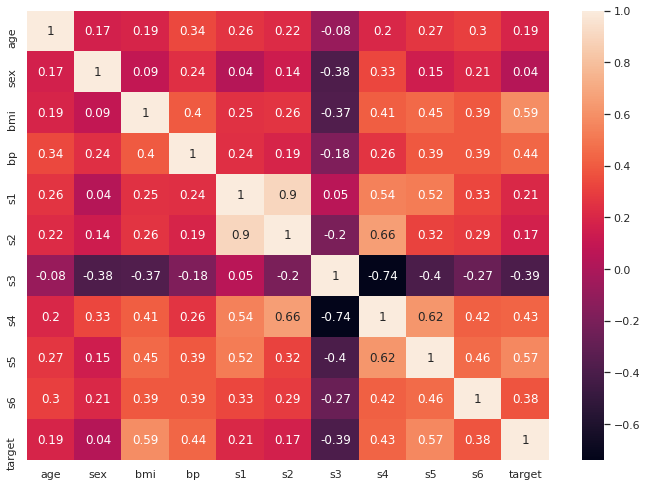

In [6]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
matrix_heatmap = diabetes.corr().round(2)
sns.heatmap(data=matrix_heatmap, annot=True) # Usamos o parametro 'annot=True' 
# para definirmos que queremos os valores dentro dos blocos do heatmap
plt.show()

Ao analisar a mtriz de correlacao, podemos identificar algumas caracteristicas importantes. 

1.   Na maioria dos casos, a correlacao e positiva.
2.   As caracteristicas mais correlacionadas com a de interesse sao: s5, s4, bp e bmi
3.   O sexo e a idade nao tem mta relacao com nossa caracteristica de interesse.

Identificadas essas relacoes, precisamos entender como essas principais caracteristicas interagem entre si, para isso, podemos utilizar um grafico de dispersao, para por exemplo entender a relacao de entre o 'target' e o 'bmi'.

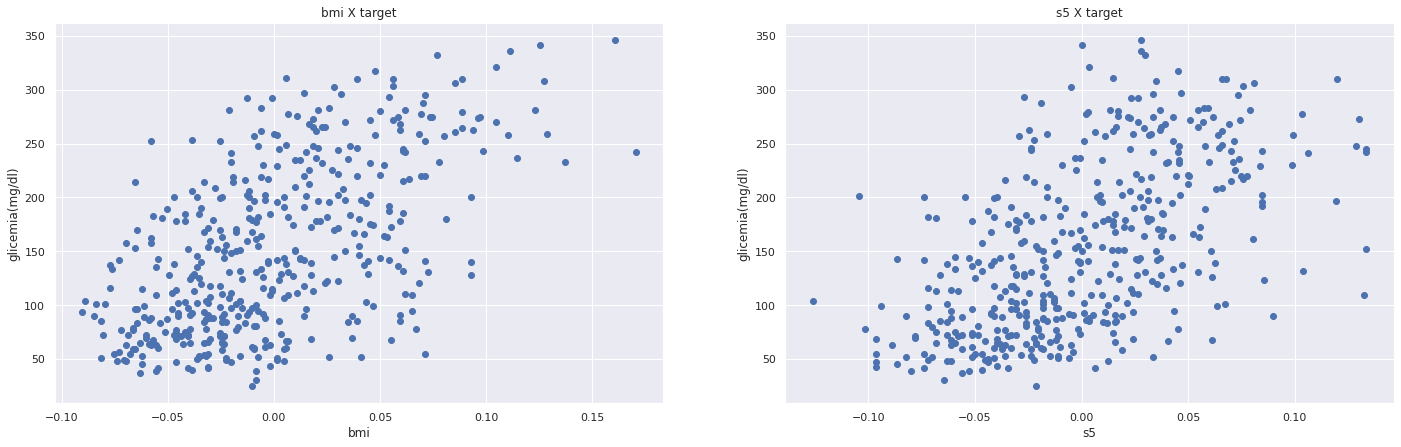

In [7]:
plt.figure(figsize=(24,7))
features = ['bmi', 's5']
target = diabetes['target']
for i, col in enumerate(features):
	plt.subplot(1, len(features), i+1)
	x = diabetes[col]
	y = target
	plt.scatter(x, y)
	plt.title(col + ' X target')
	plt.xlabel(col)
	plt.ylabel('glicemia(mg/dl)')
plt.show()

Identificamos que os pontos sao distribuidos de forma bem uniforme, sem muitos desvios. Dito isto e analisado o nosso dataset, concluimos 2 coisas:


1.   As caracteristicas s5, s4, bp e bmi sao os que mais "explicam" nosso atributo de interesse, sendo as caracteristicas mais indicadas para a construcao de uma regressao.
2.   A distribuicao esta bem solida, garantindo possivelmente boa taxa de acerto.

Dito isto, partimos para a construcao da nossa regressao linear, com o objetivo de sermos capazes de "prever" futuramente o resultado de uma pessoa um ano a frente, utilizando estes mesmos parametros.

# Criando o modelo de regressao linear

Primeiro precisamos criar nosso conjunto de caracteristicas e nosso conjunto alvo. Juntamente, para avaliarmos melhor a eficacia de nosso modelo, iremos separar o conjunto em 2, um conjunto de treino e outro conjunto de testes. Fazemos isso, para testarmos o desempenho do modelo com dados ainda nao conhecidos por ele.

In [0]:
x = pd.DataFrame(np.c_[diabetes['s5'], diabetes['s4'], diabetes['bmi'], 
                       diabetes['bp']], columns=['s5', 's4', 'bp', 'bmi'])
y = diabetes['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                    random_state=5)

Feito isso, criamos nosso modelo e o treinamos usando nossos conjuntos de treino.

Apos feito isso, utilizamos o metodo *predict* para predizermos os valores alvo, utilizando as caracteristicas que passarmos via parametro, nesse caso, utilizamos as mesmas caracteristicas com as quais treinos nosso modelo, utilizamos esse conjunto, por que primeiro queremos avaliar o desempenho do modelo com dados que ele ja conhece.

Os metodos para aferencia da perfomance do modelo sao os seguintes:


*   A raiz da media dos quadrados dos residuos. Este indicador, quanto mais proximo de 0, melhor a perfomance do modelo.
*   Coeficiente de determinacao. Indica o quanto o nosso modelo explica a variancia de nossas variaveis, ou seja, quanto mais proximo de 1(100%) melhor nosso modelo.

Apos feita essa afericao, plotamos o valor previsto 



In [9]:
model = LinearRegression()
model.fit(x_train, y_train)
train_predict = model.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train, train_predict)))
r2 = r2_score(y_train, train_predict)

print('Conjunto de treino')
print('---------RMSE----------')
print(rmse)
print('---------r2----------')
print(f'{r2} \n')

Conjunto de treino
---------RMSE----------
55.122383390647464
---------r2----------
0.4783345946959775 



Agora realizamos o mesmo processo com nosso conjunto de teste.

In [10]:
test_predict = model.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, test_predict)))
r2 = r2_score(y_test, test_predict)

print('Conjunto de treino')
print('---------RMSE----------')
print(rmse)
print('---------r2----------')
print(f'{r2} \n')

Conjunto de treino
---------RMSE----------
57.260498796137384
---------r2----------
0.480027108605535 



# Fontes, documentacoes e links:


*   https://en.wikipedia.org/wiki/Root-mean-square_deviation
*   https://pt.wikipedia.org/wiki/Coeficiente_de_determina%C3%A7%C3%A3o
*   https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes



